# Linear Regression

Overview: Linear Regression model learn to create a straight (linear) generally describe the trend of all data points. The general equation of linear:  
    
$$Y = wX + b$$

From there, the model can predict the value of correspond Y based if new given X.


In [3]:
import numpy as np                  # for calculation
import pandas as pd                 # for data handling (csv)
import matplotlib.pyplot as plt     # for plot, visualization, chart & graphs


In [37]:
# one variable linear regression
df = pd.read_csv("data/Salary_dataset.csv")
df = df.iloc[:, 1:]
df.count(), df.head()

(YearsExperience    30
 Salary             30
 dtype: int64,
    YearsExperience   Salary
 0              1.2  39344.0
 1              1.4  46206.0
 2              1.6  37732.0
 3              2.1  43526.0
 4              2.3  39892.0)

## Simple Linear Regression

The model predict output $\hat{y}$ based on a single input X value

### State the problem 

To synthesize the equation that it's visualize line fit the trend of data, we need to find the value of weight ($w$)
Given a pair of data $(x, y)$, we need to find the proper value of $w$ that prediced value of $\hat{y} = wx +b$ close to ground-truth value of $y$

### Solution

To quantify the difference between prediction $\hat{y}$ and ground-truth $y$, we define the Loss Function as follow:

$$ L(w) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i) ^ 2 $$

Minimize the difference between prediction $\hat{y}$ and ground-truth $y$ means minimize the result of loss function given the variable weight $(w)$.
In math, the value of variable that minimize the output of the function is the value that cause its derivative = 0
Derivative if $L(w)$ is:

$$ \frac{dL(w)}{dw} = \frac{2}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot \frac{d\hat{y}_i}{dw} $$
$$ \Leftrightarrow \frac{dL(w)}{dw} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i $$

To find the optimal weight $(w)$

$$ \frac{dL(w)}{dw} = 0 $$
$$ \Leftrightarrow \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_i = 0 $$
$$ \Leftrightarrow \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i) x_i}{n} = 0 $$
$$ \Leftrightarrow \frac{\sum_{i=1}^{n} (y_i - w x_i - b) x_i}{n} = 0 $$
$$ \Leftrightarrow \frac{\sum_{i=1}^{n} (y_ix_i - w x_i ^ 2 - bx_i)}{n} = 0 $$
$$ \Leftrightarrow \sum_{i=1}^{n} (y_ix_i - w x_i ^ 2 - bx_i) = 0 $$
$$ \Leftrightarrow \sum_{i=1}^{n} w x_i ^ 2 = \sum_{i=1}^{n} y_ix_i - bx_i $$
$$ \Leftrightarrow w = \sum_{i=1}^{n} \frac{y_ix_i - bx_i}{x_i ^ 2} $$

### Example: Predict *salary* based on *years of Experience*

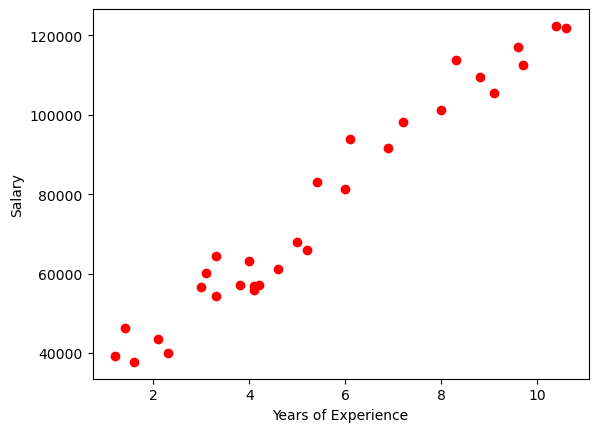

In [56]:
# plot data
X = df["YearsExperience"].to_numpy()
Y = df["Salary"].to_numpy()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X, Y, "ro")

In [65]:
bias = 0.1
w = ((Y * X).sum() - bias * X.sum()) / (X ** 2).sum() # compute w

Text(0, 0.5, 'Salary')

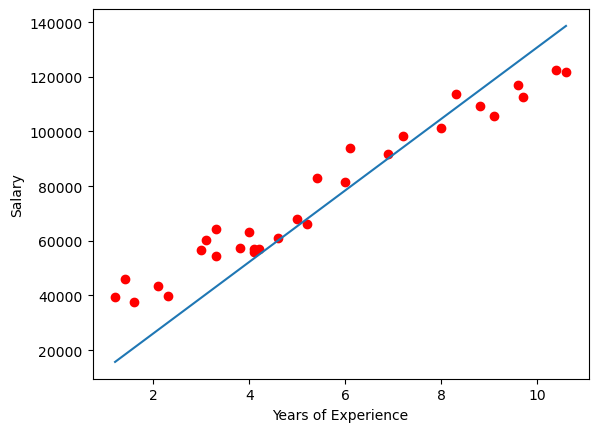

In [66]:
# visualize the equation with computed w
vis_x = np.linspace(np.min(X), np.max(X), 100)
vis_y = np.linspace((np.min(X) * w), (np.max(X)*w), 100)
plt.plot(X, Y, "ro")
plt.plot(vis_x, vis_y, label=f'y = {w}x')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

It seems that we have found the correct $w$ value, the equation perfectly describe training data trend!

In [69]:
## Test
# Training data
print(X)
print(Y)

# Test on train data
input = X[11]
ground_truth = Y[11]
prediction = input * w + bias
print('Years of Experience: {} -> predicted Salary: {} - ground-truth Salary: {}'.format(input, prediction, ground_truth))

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]
Years of Experience: 4.1 -> predicted Salary: 53614.325344213976 - ground-truth Salary: 55795.0


## Multiple Linear Regression

Type of Linear Regression where the prediction is based on more than one factors.
$$ y = w_1x_1 + w_2x_2 + ... + w_px_p + b $$

Where: 
- $p$: number of factors
- $b$: bias



## Solution 1: Compute each $w (w1,w2,...)$ using partial derivative of loss function

*For this intuition, let's consider only 2 weights model*
$$ y = w_1x_1 + w_2x_2 + b $$

Loss function:
$$ L(w_1, w_2) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y_i}) ^ 2 $$

Partial derivatives:
$$ \frac{dL(w_1)}{dw_1} = \sum_{i=1}^{n} [y_i - (x_1w_1 + x_2w_2 + b)] \frac{d [y_i- (x_1w_1 + x_2w_2 + b)]}{dw_1} = 0 $$

## Discussion
1. Why do we compute $y - \hat{y}$ instead of $\hat{y} - y$
2. What is the weakness of linear regression